In [1]:
import numpy as np
import tensorflow as tf

In [2]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [3]:
x = np.random.random((10,1))
y = np.random.random((32, 10))

In [4]:
#arrays:
x = np.array([[0., 1.],
                 [2., 3.],
                 [4., 5.]])
print(x)
print(x.shape)
x

#reshaping arrays for like this. the dimensions have to match. 
x.reshape(1,6)
x

[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]]
(3, 2)


array([[ 0.,  1.],
       [ 2.,  3.],
       [ 4.,  5.]])

In [5]:
from keras.datasets import mnist

#this is just the MNIST data set

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

Using TensorFlow backend.


3
(60000, 28, 28)
uint8


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

#digit = train_images[100]
#plt.imshow(digit, cmap=plt.cm.binary)
#plt.show()

In [7]:
from keras.datasets import imdb

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#vectorizing the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#makign them arrays of float32 precision
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

#configure the model for training
model = models.Sequential()
#add layers--
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer,loss function and metrics are strings because they're part of Keras
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

#     to use custom losses and metrics:
#  from keras import losses
#  from keras import metrics


#  model.compile(optimizer=optimizers.RMSprop(lr=0.001),   
#            loss=losses.binary_crossentropy,
#            metrics=[metrics.binary_accuracy])


In [11]:
from keras import optimizers

#configurating the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 388us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 338us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

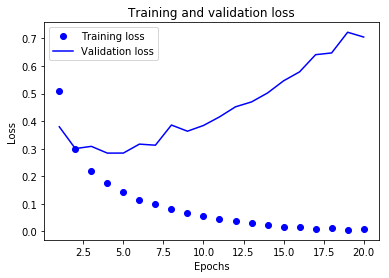

In [12]:
%matplotlib inline

history_dict = history.history
history_dict.keys()

#iterate through all the keys
#for key, value in history_dict.items():
#    print key, value

#plot the data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
acc_values = history_dict['acc'] val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-e3331169327f>, line 1)